In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import datetime as dt
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


%matplotlib inline

In [56]:
xlsx = pd.ExcelFile("data/Data23.xlsx")
sales= pd.read_excel(xlsx, "SALES")
products= pd.read_excel(xlsx, "PRODUCTS")
customers= pd.read_excel(xlsx, "CUSTOMERS")

In [57]:
customers['UserID'].isin(sales['UserID']).value_counts()

True     3578
False     353
Name: UserID, dtype: int64

In [58]:
sales['UserID'].isin(customers['UserID']).value_counts()

True     69059
False        5
Name: UserID, dtype: int64

In [59]:
df = sales.merge(customers,on='UserID')
df = df.merge(products,on='ProductID')
df

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount,UserFirstTransaction,Gender,Location,Age,Category
0,1,500546547,2017-01-01 01:40:39,10334,MOBILE,Cash,51.0,No,2015-03-18 00:00:00,FEMALE,ANKARA,30,Female Shoes
1,8317,500546547,2017-03-30 23:53:07,10334,MOBILE,Cash,21.0,No,2015-03-18 00:00:00,FEMALE,ANKARA,30,Female Shoes
2,6628,500338383,2017-03-14 01:17:28,10334,WEB,Cash,21.0,No,2014-06-19 00:00:00,FEMALE,TRABZON,28,Female Shoes
3,33462,500338383,2017-11-05 15:09:01,10334,WEB,Mobile Payment,30.0,No,2014-06-19 00:00:00,FEMALE,TRABZON,28,Female Shoes
4,39656,500338383,2017-12-27 17:49:19,10334,WEB,Mobile Payment,36.0,No,2014-06-19 00:00:00,FEMALE,TRABZON,28,Female Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69054,58137,500352617,2018-04-27 13:56:52,10469,MOBILE,Online Credit Card,60.0,Yes,2017-12-08 21:29:50,MALE,TRABZON,32,Female Fashion
69055,58189,500317967,2018-04-27 18:10:52,10469,WEB,Mobile Payment,45.0,No,2014-11-29 00:00:00,FEMALE,ISTANBUL,25,Female Fashion
69056,59746,500536350,2018-05-06 17:41:55,10469,MOBILE,Cash,45.0,No,2012-04-15 00:00:00,FEMALE,IZMIR,28,Female Fashion
69057,66022,500318022,2018-06-13 17:31:08,10601,WEB,Cash,43.5,No,2016-03-24 00:00:00,FEMALE,ADANA,31,Electronic Accessories


In [60]:

df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort the dataframe in descending order based on the 'DateTime' column
df.sort_values('DateTime', ascending=False, inplace=True)

# Keep only the last occurrence of each user
last_occurrence = df.drop_duplicates('UserID', keep='first')

# Select the 'UserID' and 'DateTime' columns
User_last_transaction = last_occurrence[['UserID', 'DateTime']]

# Print the resulting dataframe
User_last_transaction= User_last_transaction.rename(columns={'DateTime':'UserLastTransaction'})

In [61]:
df= df.merge(User_last_transaction,on='UserID')
df.sort_values('DateTime', ascending= True)

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount,UserFirstTransaction,Gender,Location,Age,Category,UserLastTransaction
17623,1,500546547,2017-01-01 01:40:39,10334,MOBILE,Cash,51.00,No,2015-03-18 00:00:00,FEMALE,ANKARA,30,Female Shoes,2018-06-28 19:35:53
34321,2,500240813,2017-01-01 03:27:58,10610,WEB,Cash,108.00,No,2015-07-24 00:00:00,FEMALE,IZMIR,27,Male Fashion,2018-06-22 17:42:50
29118,3,500460527,2017-01-01 04:42:47,10579,MOBILE,Cash,22.50,No,2015-01-06 00:00:00,MALE,ANTALYA,33,Female Fashion,2018-06-25 01:12:10
37798,4,500338383,2017-01-01 06:25:01,10720,WEB,Mobile Payment,42.00,No,2014-06-19 00:00:00,FEMALE,TRABZON,28,TVs and TV Sets,2018-06-20 23:49:06
19760,5,500591427,2017-01-01 11:19:42,10677,MOBILE,Mobile Payment,59.70,No,2013-05-12 00:00:00,FEMALE,ISTANBUL,28,Sport Shoes,2018-06-28 14:10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69060,500527737,2018-06-30 22:44:08,10696,MOBILE,Cash,48.00,No,2008-06-07 00:00:00,FEMALE,ADANA,25,Sound Systems,2018-06-30 22:44:08
723,69061,500398938,2018-06-30 23:04:05,10541,MOBILE,Cash,75.00,No,2017-05-07 12:55:10,MALE,ESKISEHIR,23,Female Fashion,2018-06-30 23:04:05
696,69062,500367467,2018-06-30 23:08:46,10526,MOBILE,Cash,50.25,No,2018-01-17 17:49:17,MALE,BURSA,45,Female Fashion,2018-06-30 23:08:46
405,69063,500268709,2018-06-30 23:39:24,10680,WEB,Online Credit Card,66.00,No,2016-10-04 00:00:00,FEMALE,BURSA,38,TVs and TV Sets,2018-06-30 23:39:24


In [62]:
df['UserLastTransaction'] = pd.to_datetime(df['UserLastTransaction'])
df['UserFirstTransaction'] =  pd.to_datetime(df['UserFirstTransaction'])
churn_date = dt.datetime.strptime('2018-06-25', '%Y-%m-%d')
df['churn'] = (df['UserLastTransaction'] > churn_date).astype(int)
df.head()

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount,UserFirstTransaction,Gender,Location,Age,Category,UserLastTransaction,churn
0,69064,500301456,2018-06-30 23:56:15,10224,WEB,Cash,59.85,No,2016-09-09,FEMALE,ANTALYA,38,Sport Shoes,2018-06-30 23:56:15,1
1,69042,500301456,2018-06-30 20:43:07,10610,WEB,Cash,60.00,No,2016-09-09,FEMALE,ANTALYA,38,Male Fashion,2018-06-30 23:56:15,1
2,68727,500301456,2018-06-28 23:35:24,10224,WEB,Cash,60.00,No,2016-09-09,FEMALE,ANTALYA,38,Sport Shoes,2018-06-30 23:56:15,1
3,68554,500301456,2018-06-27 23:07:07,10117,WEB,Cash,48.00,No,2016-09-09,FEMALE,ANTALYA,38,Female Shoes,2018-06-30 23:56:15,1
4,68177,500301456,2018-06-25 21:36:39,10610,MOBILE,Cash,66.00,No,2016-09-09,FEMALE,ANTALYA,38,Male Fashion,2018-06-30 23:56:15,1


In [63]:
period1 = df.loc[(df['DateTime'].dt.month <= 9) & (df['DateTime'].dt.year <= 2017)]
period2 = df.loc[ df['DateTime'] >= '2017-10-01']
six_month =period1[period1['DateTime'].dt.month <= 6]['UserID']
three_month= period1[(period1['DateTime'].dt.month > 6) & (period1['DateTime'].dt.month <= 9)]['UserID']
# churned_users = six_month[(~six_month.isin(three_month))].unique()
# active_users = six_month[(six_month.isin(three_month))].unique()
# period1['Churn'] = period1['UserID'].apply(lambda x: "Yes" if x in churned_users else "No")

## Data Evaluation

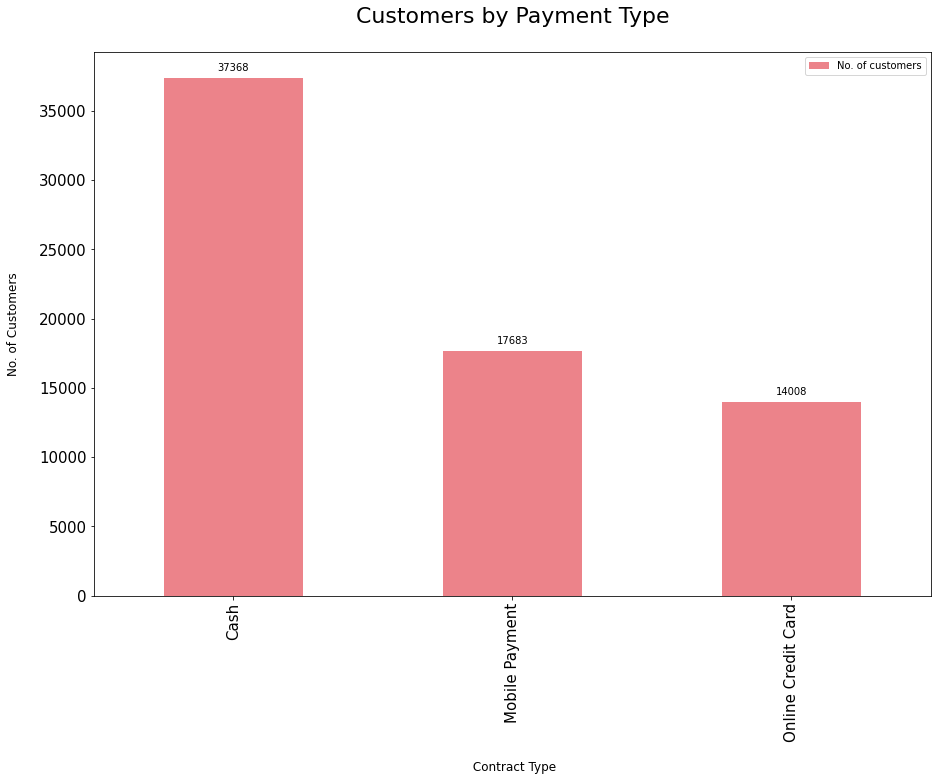

In [64]:
payment_method_split = df[[ "UserID", "PaymentType"]]
sectors = payment_method_split.groupby ("PaymentType")
payment_method_split  = pd.DataFrame(sectors["UserID"].count())
payment_method_split.rename(columns={'UserID':'No. of customers'}, inplace=True)
ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Type\n',
          horizontalalignment="center", 
          fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


x_labels = np.array(payment_method_split [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
        ax.annotate(label,
           (x_value, y_value),         
            xytext=(0, space),textcoords="offset points", 
            ha='center',va=va)
add_value_labels(ax)

<Axes: xlabel='churn', ylabel='Channel'>

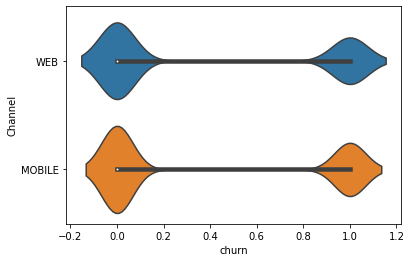

In [65]:
sns.violinplot(data=period1, x='churn', y = 'Channel' )

<Axes: xlabel='churn', ylabel='PaymentType'>

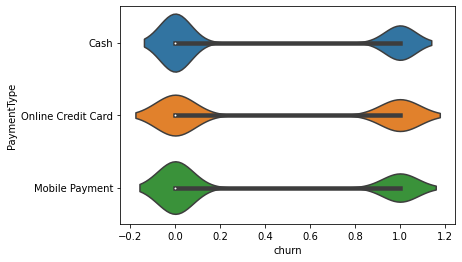

In [66]:
sns.violinplot(data=period1, x='churn', y = 'PaymentType' )

<Axes: xlabel='churn', ylabel='Discount'>

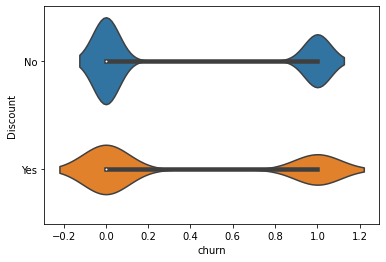

In [67]:
sns.violinplot(data=period1, x='churn', y = 'Discount' )


<Axes: xlabel='churn', ylabel='Gender'>

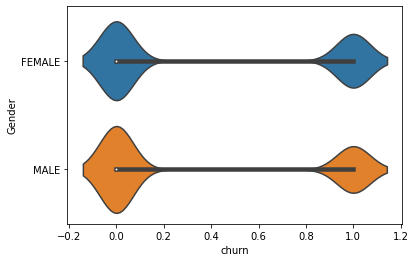

In [68]:
sns.violinplot(data=period1, x='churn', y = 'Gender' )

<Axes: xlabel='churn', ylabel='Location'>

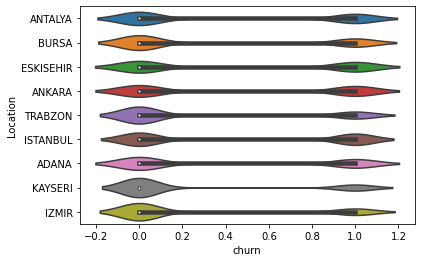

In [69]:
sns.violinplot(data=period1, x='churn', y = 'Location' )

<Axes: xlabel='churn', ylabel='Category'>

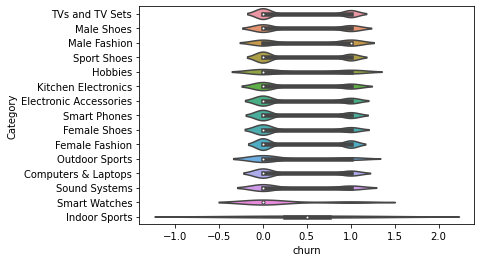

In [70]:
sns.violinplot(data=period1, x='churn', y = 'Category' )

<Axes: xlabel='churn', ylabel='Age'>

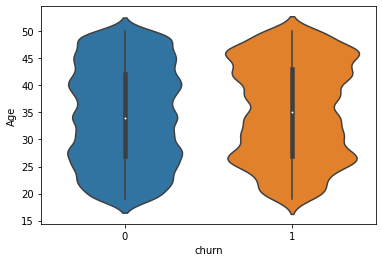

In [71]:
sns.violinplot(data=period1, x='churn', y = 'Age' )

<Axes: xlabel='churn', ylabel='Price'>

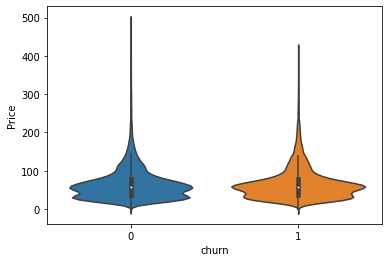

In [72]:
sns.violinplot(data=period1, x='churn', y = 'Price' )

In [73]:
citydf= period1.groupby(['Location','churn'])['UserID'].count()
citydf=citydf.unstack()

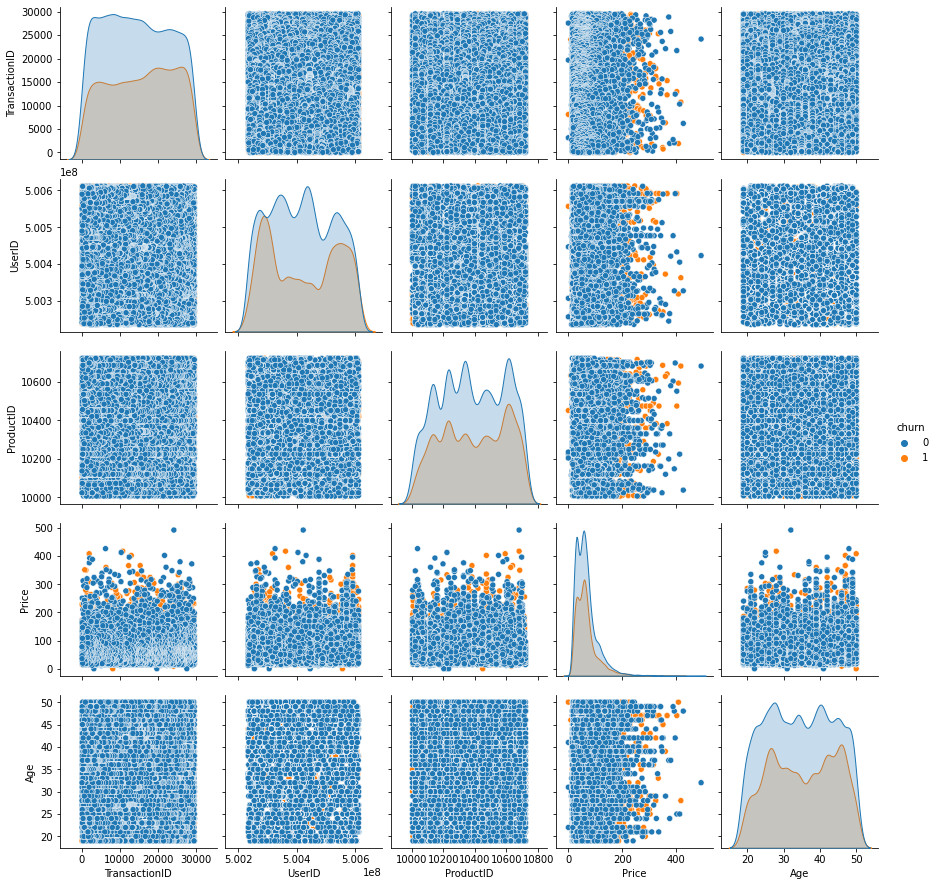

In [74]:
sns.pairplot(data = period1, hue='churn')
plt.show()

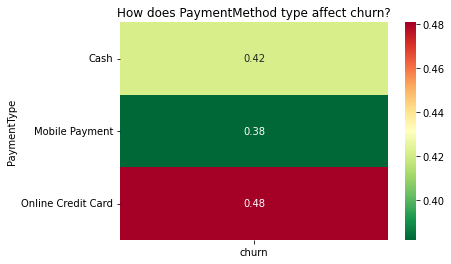

In [75]:
result = pd.pivot_table(data=df, index='PaymentType',values='churn')

sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does PaymentMethod type affect churn?')
plt.show()

In [76]:
six_month =period1[period1['DateTime'].dt.month <= 6]
six_month

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount,UserFirstTransaction,Gender,Location,Age,Category,UserLastTransaction,churn
342,18252,500301456,2017-06-30 17:37:22,10612,MOBILE,Cash,67.2,No,2016-09-09,FEMALE,ANTALYA,38,Female Fashion,2018-06-30 23:56:15,1
343,18125,500301456,2017-06-29 20:47:37,10610,MOBILE,Cash,60.0,No,2016-09-09,FEMALE,ANTALYA,38,Male Fashion,2018-06-30 23:56:15,1
344,17963,500301456,2017-06-28 18:01:19,10204,MOBILE,Cash,78.0,No,2016-09-09,FEMALE,ANTALYA,38,Male Shoes,2018-06-30 23:56:15,1
345,17846,500301456,2017-06-27 19:33:12,10114,MOBILE,Cash,41.7,No,2016-09-09,FEMALE,ANTALYA,38,Smart Phones,2018-06-30 23:56:15,1
346,17702,500301456,2017-06-26 15:58:23,10612,MOBILE,Cash,48.0,No,2016-09-09,FEMALE,ANTALYA,38,Female Fashion,2018-06-30 23:56:15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69054,148,500483638,2017-01-02 17:18:41,10455,WEB,Online Credit Card,146.4,No,2017-01-02,MALE,ISTANBUL,45,Female Fashion,2017-01-02 17:18:41,0
69055,120,500284340,2017-01-02 14:04:22,10165,WEB,Online Credit Card,108.0,No,2016-12-28,FEMALE,ANKARA,45,Female Fashion,2017-01-02 14:04:22,0
69056,33,500589667,2017-01-01 15:45:38,10024,MOBILE,Mobile Payment,46.5,No,2015-09-16,MALE,ISTANBUL,48,Female Fashion,2017-01-01 15:45:38,0
69057,25,500489446,2017-01-01 14:49:23,10137,WEB,Cash,36.0,No,2017-01-01,FEMALE,BURSA,32,Electronic Accessories,2017-01-01 14:49:23,0


<Axes: >

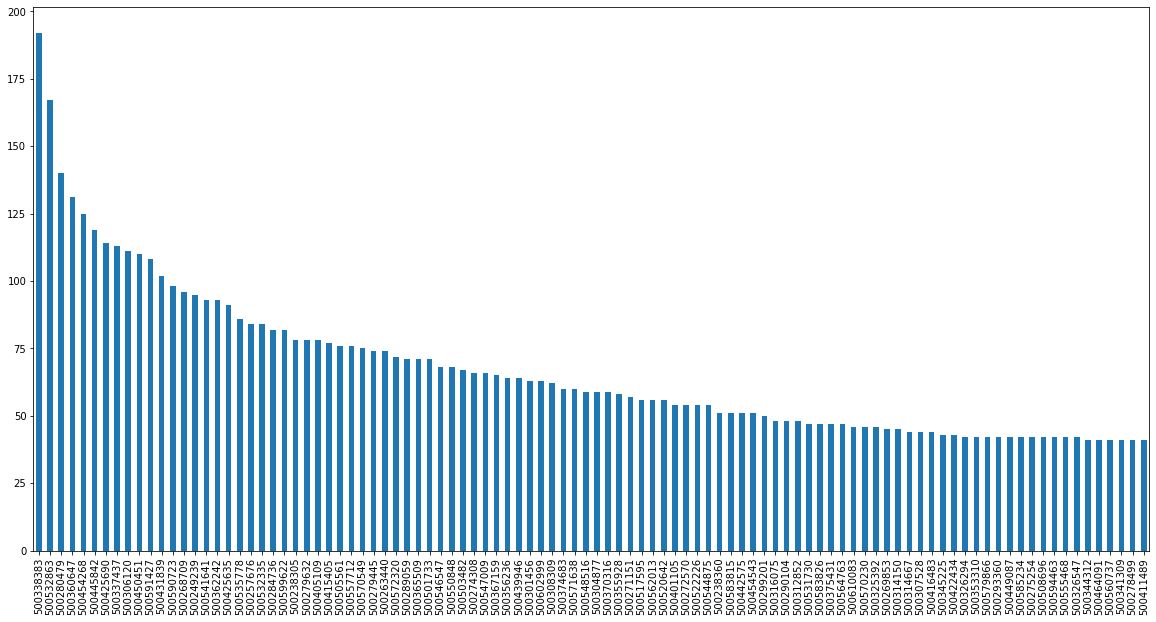

In [77]:
six_month['UserID'].value_counts().head(100).plot(kind='bar',figsize=(20,10))

In [78]:
fig = px.pie(period1.groupby('churn')['UserID'].nunique().reset_index(), 
             values='UserID', 
             names='churn')
fig.show()

In [79]:
fig = px.bar(df.groupby(['Location','churn'])['UserID'].count().reset_index().sort_values('UserID',
                                                                                    ascending=False).head(50),
             x='Location',
             y='UserID', 
             color = 'churn',
             text = 'UserID')
fig.show()

## Prediction

In [80]:
features=['PaymentType', 'Discount', 'Location', 'Age']

In [81]:
x = df[features].values
y = df['churn'].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [83]:
np.shape(X_train)

(55247, 4)

In [84]:

df['UserLastTransaction'] = pd.to_datetime(df['UserLastTransaction'])
df['UserFirstTransaction'] =  pd.to_datetime(df['UserFirstTransaction'])
churn_date = dt.datetime.strptime('2018-06-25', '%Y-%m-%d')
df['churn'] = (df['UserLastTransaction'] > churn_date).astype(int)
df = df.join(pd.get_dummies(df.PaymentType, drop_first= True))
df = df.join(pd.get_dummies(df.Discount, drop_first=True))
df = df.join(pd.get_dummies(df.Channel, drop_first= True))
df = df.join(pd.get_dummies(df.Location, drop_first=True))
df['life'] = (churn_date - df['UserFirstTransaction'])/np.timedelta64(1, 'D')# Replace the missing values in any column by large -ve value and create

df['PaymentType'] = df['PaymentType'].fillna(-1000)
df['Location'] = df['Location'].fillna(-1000)

df['Age'] = (df['Age'].isnull()).astype(int)
df.head()

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount,UserFirstTransaction,Gender,...,WEB,ANKARA,ANTALYA,BURSA,ESKISEHIR,ISTANBUL,IZMIR,KAYSERI,TRABZON,life
0,69064,500301456,2018-06-30 23:56:15,10224,WEB,Cash,59.85,No,2016-09-09,FEMALE,...,1,0,1,0,0,0,0,0,0,654.0
1,69042,500301456,2018-06-30 20:43:07,10610,WEB,Cash,60.00,No,2016-09-09,FEMALE,...,1,0,1,0,0,0,0,0,0,654.0
2,68727,500301456,2018-06-28 23:35:24,10224,WEB,Cash,60.00,No,2016-09-09,FEMALE,...,1,0,1,0,0,0,0,0,0,654.0
3,68554,500301456,2018-06-27 23:07:07,10117,WEB,Cash,48.00,No,2016-09-09,FEMALE,...,1,0,1,0,0,0,0,0,0,654.0
4,68177,500301456,2018-06-25 21:36:39,10610,MOBILE,Cash,66.00,No,2016-09-09,FEMALE,...,0,0,1,0,0,0,0,0,0,654.0


In [85]:
# features_1 = ['Channel','Price',"Age" ]
# X = df[features_1].values
# y = df['churn'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
# def logistic_regression(X_train, X_test, y_train, y_test):
#     model = LogisticRegression()
#     model.fit(X_train, y_train)
#     # predict class labels for the test set (Churn = True, Not Churn = False)
#     predicted = model.predict(X_test)
#     # generate class probabilities
#     probs = model.predict_proba(X_test)
#     return model, predicted, probs

In [87]:
# model, predicted, probs = logistic_regression(X_train, X_test, y_train, y_test)